In [1]:
PP=RR['x']

In [2]:
def sine_family(ring, sine_order):
    x = ring.gen()

    p = sine_order

    cosx = sum([(-1)**n * x**(p*n)/factorial(p*n) for n in range(40)])
    sinx_all = [
        sum([(-1)**(n+1) * x**(p*n+p-index)/factorial(p*n+p-index) for n in range(40)])
        for index in range(1, p)
    ]

    fam1 = [cosx, *sinx_all]
    fam2 = [-f for f in fam1]
    return [*fam1, *fam2]

In [3]:
def hypscale(ff, factor):
    def _f(x):
        return ff(x)/(e**(x*factor))
    
    return _f

In [4]:
WIDTH_EPS = 0.00001
ZERO_EPS = 0.0000001

def bisect(ff, xmin, xmax):
    b1 = ff(xmin)
    b2 = ff(xmax)

    if abs(b1) < ZERO_EPS:
        return xmin
    if abs(b2) < ZERO_EPS:
        return xmax

    if b1 * b2 > 0:
        raise RuntimeError(f'bisection failed {xmin} < {xmax}')

    while True and xmax-xmin > WIDTH_EPS:
        xmid = xmin + (xmax-xmin)/2
        
        #print(f'bisection progress {xmin} < {xmid} < {xmax}')
        
        bmid = ff(xmid)
        
        if abs(bmid) < ZERO_EPS:
            return xmid
        
        if xmax-xmid <= WIDTH_EPS:
            return xmid
        
        if bmid * b1 > 0:
            xmin = xmid
        elif bmid * b2 > 0:
            xmax = xmid
        else:
            raise RuntimeError(f'bisection failed {xmin} < {xmid} < {xmax}')

def find_zero_train(ff, xmax=50):
    flast = ff(1.)
    xlast = 1.
    
    if abs(flast) < ZERO_EPS:
        yield xlast

        flast = ff(1.25)
        xlast = 1.25
        
    for n in range(2, xmax):
        fnext = ff(RR(n))
        xnext = RR(n)
        
        if abs(fnext) < ZERO_EPS:
            yield xnext
            
            fnext = ff(n+0.25)
            xnext = n+0.25
        elif flast * fnext < 0.:
            yield bisect(ff, xlast, xnext)

        #print(f'f({n})={round(fnext, 3)}')
            
        flast = fnext
        xlast = xnext


In [5]:
def print_diff_table(xlist):
    layer = list(xlist)
    for level in range(3):
        print((' '*5*level)+'  '.join(f'{x:8.3f}' for x in layer))
        
        if len(layer) < 2:
            break
        
        layer = [y-x for x, y in zip(layer[:-1], layer[1:])]

In [6]:
# e^(-x)
ff1=sine_family(PP, 1)

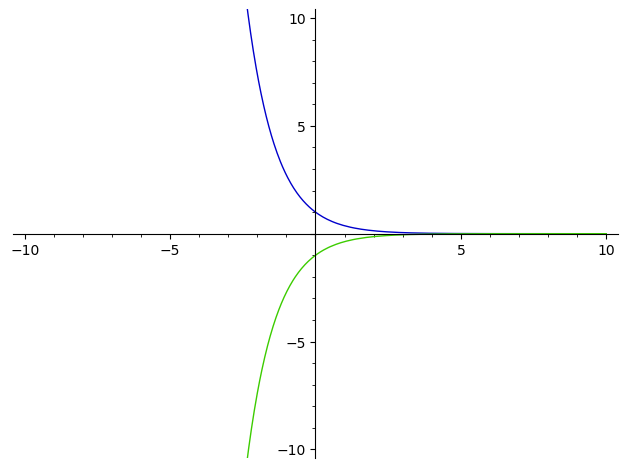

In [7]:
plot(ff1, xmin=-10, xmax=10, ymin=-10, ymax=10)

   3.142     6.283     9.425    12.566    15.708    18.850    21.991    25.133    28.274
        3.142     3.142     3.142     3.142     3.142     3.142     3.142     3.141
             0.000    -0.000     0.000    -0.000     0.000     0.000    -0.001


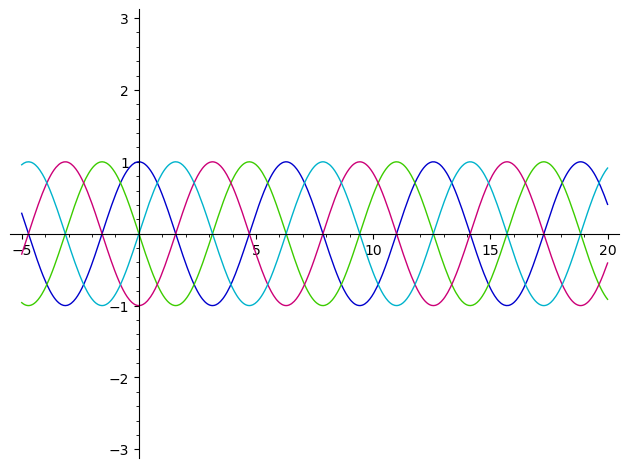

In [9]:
pargs = dict(xmin=-5, xmax=20, ymin=-3, ymax=3)

ff=sine_family(PP, 2)
print_diff_table(find_zero_train(ff[1]))
show(plot(ff, **pargs))

   4.233     7.860    11.487    15.115    18.743    22.370    25.998    29.625    33.253    36.881    40.508    44.136    47.763
        3.627     3.628     3.628     3.628     3.628     3.628     3.628     3.628     3.628     3.628     3.628     3.628
             0.001     0.000    -0.000     0.000     0.000    -0.000     0.000     0.000    -0.000     0.000     0.000


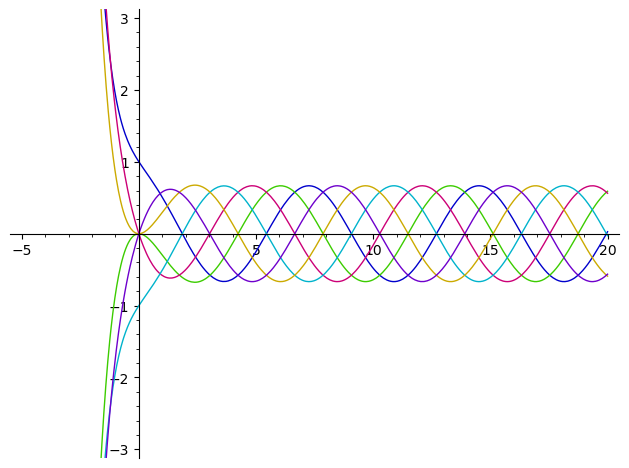

In [10]:
ff=sine_family(PP, 3)
print_diff_table(find_zero_train(ff[1]))
ff=[hypscale(fg, .5) for fg in ff]
plot(ff, **pargs)

   5.553     9.996    14.439    18.882    23.325    27.768    32.211    36.654    41.097    45.540
        4.443     4.443     4.443     4.443     4.443     4.443     4.443     4.443     4.443
            -0.001     0.000     0.000    -0.000     0.000     0.000     0.000    -0.000


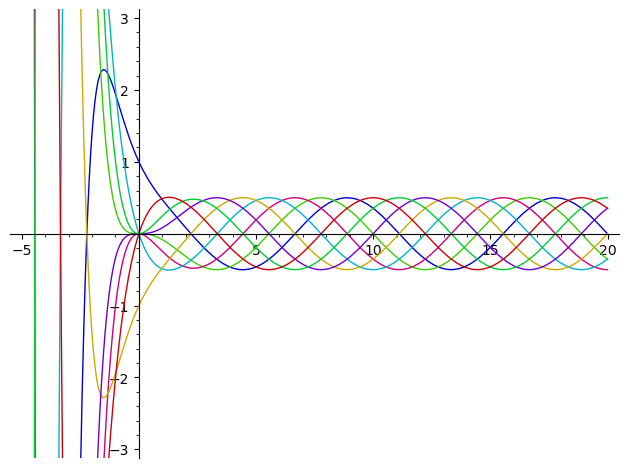

In [11]:
ff=sine_family(PP, 4)
print_diff_table(find_zero_train(ff[1]))
ff=[hypscale(fg, 1/sqrt(2)) for fg in ff]
show(plot(ff, **pargs))

   2.607     8.017    13.362    18.707    24.052    29.396    34.741    40.086    45.431
        5.410     5.345     5.345     5.345     5.345     5.345     5.345     5.345
            -0.065    -0.000    -0.000     0.000    -0.000     0.000     0.000


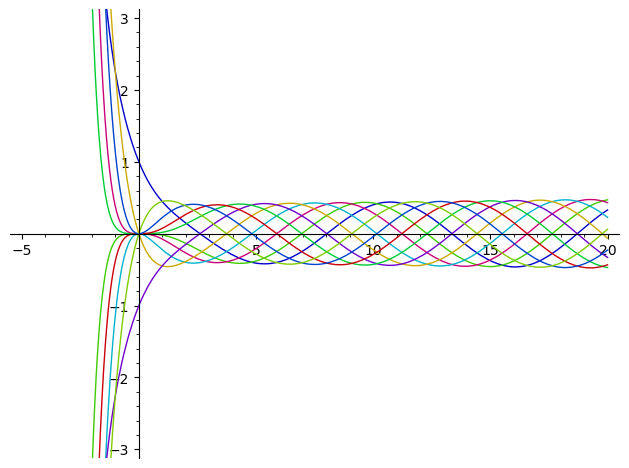

In [15]:
ff=sine_family(PP, 5)
print_diff_table(find_zero_train(ff[0]))
ff=[hypscale(fg, .8) for fg in ff]
plot(ff, **pargs)

   8.379    14.661    20.944    27.227    33.510    39.794    46.077
        6.282     6.283     6.283     6.283     6.283     6.283
             0.001     0.000     0.000     0.000     0.000


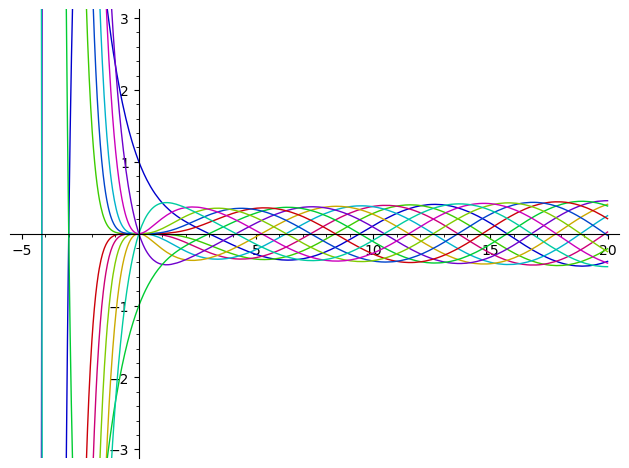

In [17]:
ff=sine_family(PP, 6)
print_diff_table(find_zero_train(ff[1]))
ff=[hypscale(fg, .85) for fg in ff]
plot(ff, **pargs)

   9.827    17.067    24.308    31.548    38.789    46.030
        7.240     7.241     7.241     7.241     7.241
             0.000     0.000     0.000     0.000


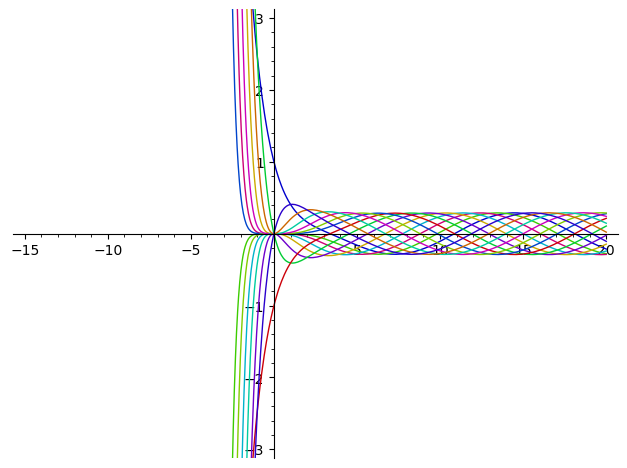

In [18]:
ff=sine_family(PP, 7)
print_diff_table(find_zero_train(ff[1]))
ff=[hypscale(fg, .9) for fg in ff]

pargs['xmin']=-15

plot(ff, **pargs)

  11.285    19.497    27.707    35.916    44.125
        8.213     8.209     8.209     8.209
            -0.003     0.000     0.000


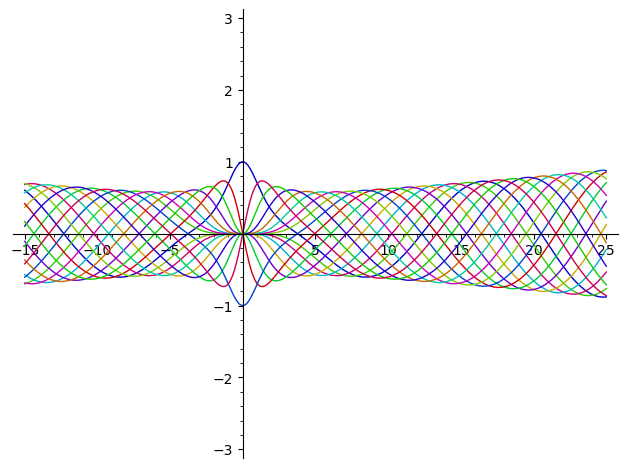

In [34]:
ff=sine_family(PP, 8)
print_diff_table(find_zero_train(ff[1]))
ff=[hypscale(fg, 1.11) for fg in ff]

pargs['xmin']=-15
pargs['xmax']=25

plot(ff, **pargs)

  12.748    21.943    31.128    40.314
        9.195     9.185     9.185
            -0.010     0.000


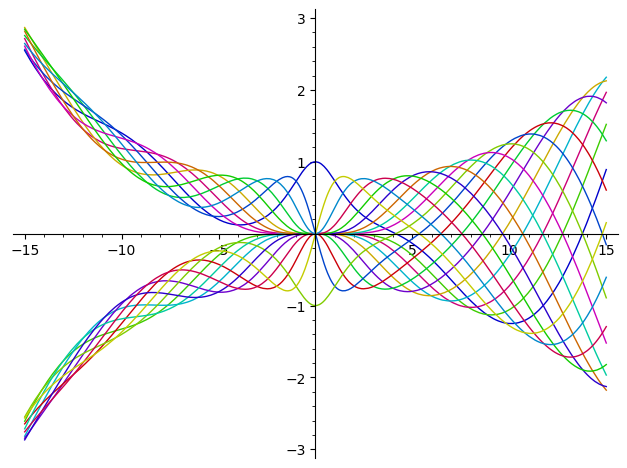

In [36]:
ff=sine_family(PP, 9)
print_diff_table(find_zero_train(ff[1]))
ff=[hypscale(fg, 1.2) for fg in ff]

pargs['xmin']=-15
pargs['xmax']=15

plot(ff, **pargs)

  14.215    24.399    34.566    44.732    54.899    65.065    75.231
       10.185    10.167    10.166    10.166    10.166    10.166
            -0.018    -0.000     0.000     0.000    -0.000


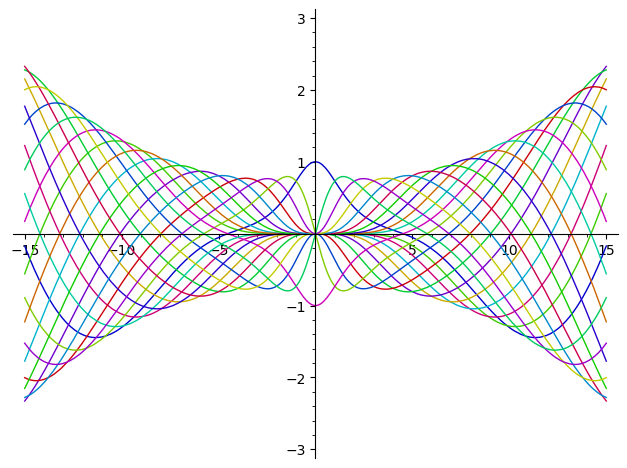

In [39]:
ff=sine_family(PP, 10)
print_diff_table(find_zero_train(ff[1], xmax=80))
ff=[hypscale(fg, 1.2) for fg in ff]

pargs['xmin']=-15
pargs['xmax']=15

plot(ff, **pargs)

  15.683    26.863    38.015    49.166    60.317    71.468
       11.180    11.152    11.151    11.151    11.151
            -0.028    -0.001     0.000    -0.000


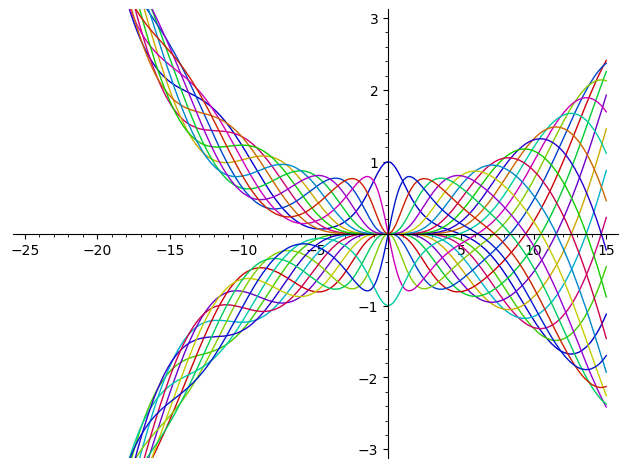

In [44]:
ff=sine_family(PP, 11)
print_diff_table(find_zero_train(ff[1], xmax=80))
ff=[hypscale(fg, 1.2) for fg in ff]

pargs['xmin']=-25
pargs['xmax']=15
pargs['ymax']=3

plot(ff, **pargs)

   1.000    17.153    29.332    41.472    53.610    65.748    77.887
       16.153    12.179    12.140    12.138    12.138    12.138
            -3.974    -0.039    -0.002    -0.000     0.000


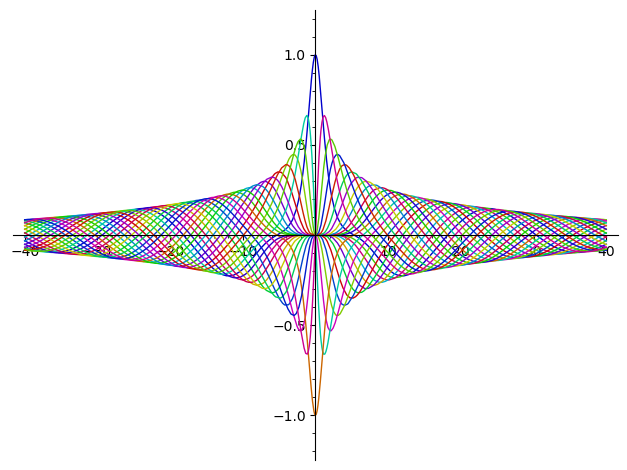

In [57]:
ff=sine_family(PP, 12)
print_diff_table(find_zero_train(ff[1], xmax=80))
ff=[hypscale(fg, 1.00) for fg in ff]

pargs['xmin']=-2*20
pargs['xmax']=2*20
pargs['ymin']=-1.2
pargs['ymax']=1.2

plot(ff, **pargs)

   1.000    20.094    34.281    48.405    62.523    76.642    90.760
       19.094    14.187    14.124    14.119    14.118    14.118
            -4.907    -0.063    -0.005    -0.000     0.000


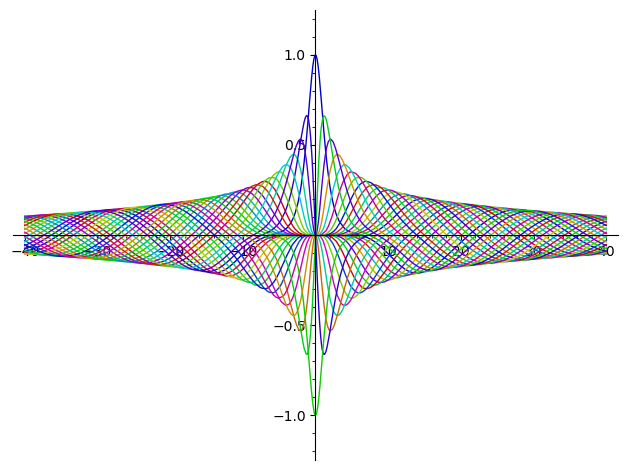

In [58]:
ff=sine_family(PP, 14)
print_diff_table(find_zero_train(ff[1], xmax=96))
ff=[hypscale(fg, 1.00) for fg in ff]

pargs['xmin']=-2*20
pargs['xmax']=2*20
pargs['ymin']=-1.2
pargs['ymax']=1.2

plot(ff, **pargs)

   6.423    22.585    37.768    52.885    67.996    83.106
       16.162    15.182    15.118    15.111    15.110
            -0.979    -0.065    -0.007    -0.001


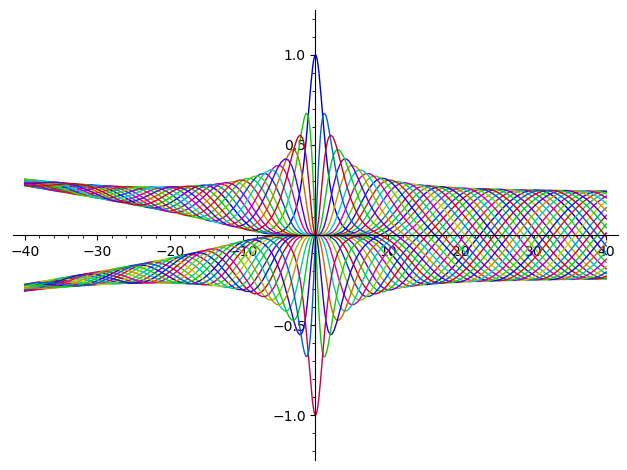

In [73]:
ff=sine_family(PP, 15)
print_diff_table(find_zero_train(ff[0], xmax=96))
ff=[hypscale(fg, 1.02) for fg in ff]

pargs['xmin']=-2*20
pargs['xmax']=2*20
pargs['ymin']=-1.2
pargs['ymax']=1.2

plot(ff, **pargs)

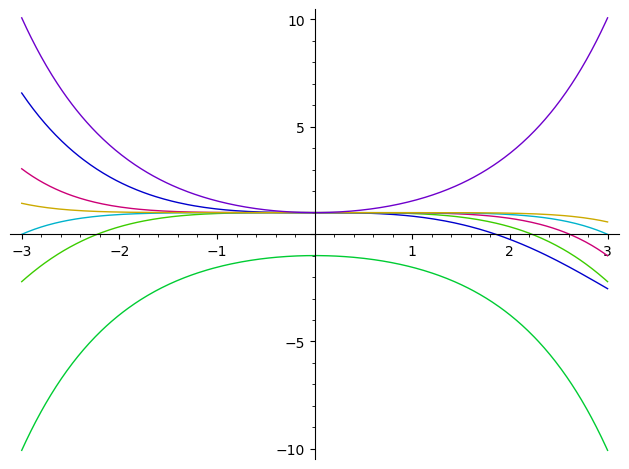

In [95]:
x3 = sum((-1)**n*x**(3*n)/factorial(3*n) for n in range(40))
x4 = sum((-1)**n*x**(4*n)/factorial(4*n) for n in range(40))
x5 = sum((-1)**n*x**(5*n)/factorial(5*n) for n in range(40))
x6 = sum((-1)**n*x**(6*n)/factorial(6*n) for n in range(40))
x7 = sum((-1)**n*x**(7*n)/factorial(7*n) for n in range(40))


plot([x3, x4, x5, x6, x7, lambda x: cosh(x), lambda x: -cosh(x)], xmin=-3, xmax=3)

In [148]:
for x in find_zero_train(ff[0]):
    print(x)
for x in find_zero_train(ff[2]):
    print(x)

1.84981536865234
f(2)=-0.246
f(3)=-2.541
f(4)=-4.666
f(5)=-3.027
5.44123077392578
f(6)=6.229
f(7)=21.54
f(8)=29.086
f(9)=3.584
9.06899261474609
f(10)=-71.408
f(11)=-162.288
f(12)=-152.587
12.6966018676758
f(13)=115.177
f(14)=660.825
f(15)=1098.622
f(16)=550.655
16.3241958618164
f(17)=-1810.012
f(18)=-5363.527
f(19)=-6537.867
19.9517898559570
f(20)=612.87
f(21)=19081.025
f(22)=39096.44
f(23)=31653.299
23.5793991088867
f(24)=-38654.866
f(25)=-168620.164
f(26)=-255144.89
f(27)=-86703.534
27.2069931030273
f(28)=508332.782
f(29)=1321625.269
f(30)=1441568.497
30.8345870971680
f(31)=-512957.497
f(32)=-5014409.762
f(33)=-9317815.055
f(34)=-6274873.371
34.4621810913086
f(35)=11923567.355
f(36)=42528940.297
f(37)=58442063.932
f(38)=9242906.208
38.0897903442383
f(39)=-139116576.732
f(40)=-322316641.448
f(41)=-310400204.114
41.7173843383789
f(42)=213046013.269
f(43)=1298880910.867
f(44)=2195652910.578
f(45)=1159802213.479
45.3449783325195
f(46)=-3490742370.0
f(47)=-10609870893.848
f(48)=-131768231